# Linear regression

## Import the house price dataset

The dataset consists of house prices from King County an area in the US State of Washington, this data also covers Seattle. The dataset was obtained from Kaggle. This data was published/released under CC0: Public Domain.

| Column | Descritption |
| --- | --- |
| id | Unique ID for each home sold |
| date | Date of the home sale |
| price | Price of each home sold |
| bedrooms | Number of bedrooms |
| bathrooms | Number of bathrooms, where .5 accounts for a room with a toilet but no shower |
| sqft_living | Square footage of the apartments interior living space |
| sqft_lot | Square footage of the land space |
| floors | Number of floors |
| waterfront | A dummy variable for whether the apartment was overlooking the waterfront or not |
| view | An index from 0 to 4 of how good the view of the property was |
| condition | An index from 1 to 5 on the condition of the apartment |
| grade | An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design |
| sqft_above | The square footage of the interior housing space that is above ground level |
| sqft_basement | The square footage of the interior housing space that is below ground level |
| yr_built | The year the house was initially built |
| yr_renovated | The year of the house's last renovation |
| zipcode | What zipcode area the house is in |
| lat | Lattitude |
| long | Longitude |
| sqft_living15 | The square footage of interior housing living space for the nearest 15 neighbors |
| sqft_lot15 | The square footage of the land lots of the nearest 15 neighbors  |

In [117]:
import pandas as pd

df = pd.read_csv(r"C:\Users\daria\PycharmProjects\StatisticsAppDS\kc_house_data.csv")
print(f'data shape: {df.shape}')
df.head(5)

data shape: (21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Visualizations

### Use plotly to plot on a map

In [44]:
install = True # set to True if plotly-express is not yet installed
if install:
    !pip install plotly-express

    # if you get the error
    # "Mime type rendering requires nbformat>=4.2.0 but it is not installed"
    # run the following line and restart the kernel!

    !pip install --upgrade nbformat

You should consider upgrading via the 'C:\Users\daria\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\daria\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [45]:
import plotly.express as px

fig = px.scatter_geo(df,lat='lat',lon='long', hover_name='price', size='bedrooms', height=580, color='price')
fig.update_layout(title ='Houses', title_x=0.5, geo_scope='usa')
fig.update_layout(
        geo = dict(
            projection_scale=12, # zoom
            center=dict(lat=47.52, lon=-122.19)
        ))
fig.show()

## Warm up questions

1. What is the mean house price?
2. What is the median house price?
3. What is the lowest and the highest price of any house?
4. How many unique zip codes appear in the sample?
5. Plot a histogram of the “sqft above” variable.
6. Do any houses appear more than once in the sample? How many?
7. How many houses in the sample were renovated?


Mean house price: 540088.1417665294
Median house price: 450000.0
Lowest house price: 75000.0, and Highest house price: 7700000.0
Number Unique zip codes: 70


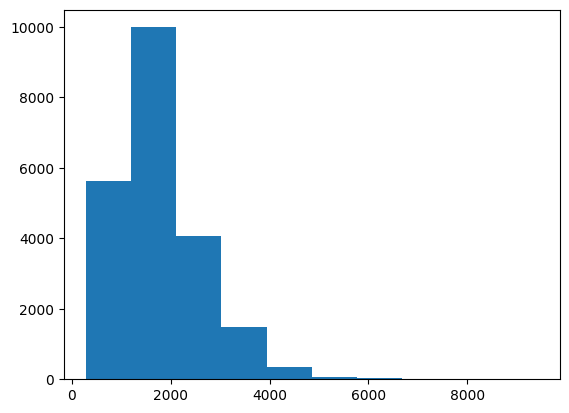

Numberofdublicateithset: 177
Dublicates:                id             date      price  bedrooms  bathrooms  \
94     6021501535  20141223T000000   700000.0         3       1.50   
314    4139480200  20141209T000000  1400000.0         4       3.25   
325    7520000520  20150311T000000   240500.0         2       1.00   
346    3969300030  20141229T000000   239900.0         4       1.00   
372    2231500030  20150324T000000   530000.0         4       2.25   
...           ...              ...        ...       ...        ...   
20181  7853400250  20150219T000000   645000.0         4       3.50   
20613  2724049222  20141201T000000   220000.0         2       2.50   
20670  8564860270  20150330T000000   502000.0         4       2.50   
20780  6300000226  20150504T000000   380000.0         4       1.00   
21581  7853420110  20150504T000000   625000.0         3       3.00   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
94            1580      5000     1.0           0

In [46]:
import math
import statistics
import matplotlib.pyplot as plt

## mean house price
mean = statistics.mean(df['price'])
print(f"Mean house price: {mean}")

## median house price
median = statistics.median(df['price'])
print(f"Median house price: {median}")

## lowest and highest price of any house
lowers = min(df['price'])
highest = max(df['price'])
print(f"Lowest house price: {lowers}, and Highest house price: {highest}")

## count unique zip codes
unique_zip_codes = set(df['zipcode'])
print(f"Number Unique zip codes: {len(unique_zip_codes)}")

## histogram of sqft above
plt.hist(df['sqft_above'])
plt.show()

## same house
duplicates=df[df.duplicated(['id'])]

print(f"Numberofdublicateithset:",len(duplicates))

print(f"Dublicates:",duplicates)

## renovated houses
renovated=df.query("yr_renovated>0")

print(f"Numberofrenovatedhouses:",len(renovated))

print(f"Renovatedhouses:",renovated)

## Simple linear regression

$ y\_pred=\beta_0+\beta_1X $

### e.g. Approximate the price of a house if we know the size

### Plot the data

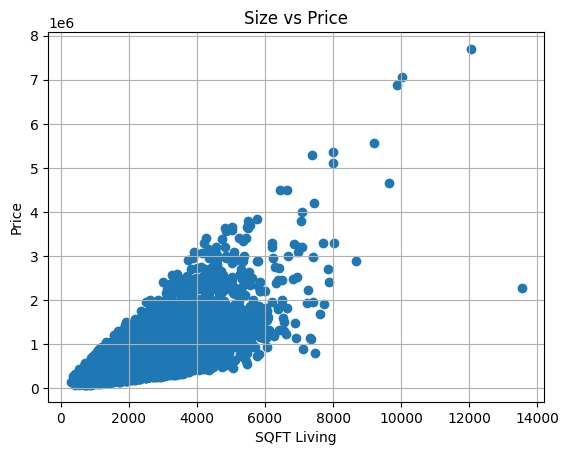

In [47]:
import matplotlib.pyplot as plt

X = df['sqft_living'].values
y = df['price'].values

# plot the data
plt.scatter(X, y)
plt.title('Size vs Price')
plt.xlabel('SQFT Living')
plt.ylabel('Price')
plt.grid()
plt.show()

### Scale the values to avoid computational errors

In [106]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.720103,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,0.647853,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,0.568795,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,0.251157,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,0.197333,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0.026467,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,0.666639,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,0.153783,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,0.029327,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [126]:
len(df)

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [120]:
"""do the scale on your own also"""
from sklearn.preprocessing import MinMaxScaler

def min_max_scale(df):
    for i in range(2, len(df.columns)):
        maximum = max(df.iloc[:,i])
        minimum = min(df.iloc[:,i])
        for j in range(len(df.iloc[:,i])):
            df.iloc[j,i] = (df.iloc[j,i]-minimum)/(maximum-minimum)
    return df

In [119]:
# price scale
df_2 = df.copy()
df_2 = min_max_scale(df_2)
df_2

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,0.019266,0.090909,0.12500,0.067170,0.003108,0.0,0,0.0,...,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742
1,6414100192,20141209T000000,0.060721,0.090909,0.28125,0.172075,0.004072,0.4,0,0.0,...,0.500000,0.206140,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027
2,5631500400,20150225T000000,0.013770,0.060606,0.12500,0.036226,0.005743,0.0,0,0.0,...,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513
3,2487200875,20141209T000000,0.069377,0.121212,0.37500,0.126038,0.002714,0.0,0,0.0,...,0.500000,0.083333,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.004996
4,1954400510,20150218T000000,0.057049,0.090909,0.25000,0.104906,0.004579,0.0,0,0.0,...,0.583333,0.152412,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,0.007871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,0.037377,0.090909,0.31250,0.093585,0.000370,0.8,0,0.0,...,0.583333,0.135965,0.000000,0.947826,0.000000,0.515152,0.874055,0.143688,0.194631,0.000986
21609,6600060120,20150223T000000,0.042623,0.121212,0.31250,0.152453,0.003206,0.4,0,0.0,...,0.583333,0.221491,0.000000,0.991304,0.000000,0.732323,0.570693,0.130399,0.246257,0.007523
21610,1523300141,20140623T000000,0.042898,0.060606,0.09375,0.055094,0.000503,0.4,0,0.0,...,0.500000,0.080044,0.000000,0.947826,0.000000,0.722222,0.705324,0.182724,0.106866,0.001558
21611,291310100,20150116T000000,0.042623,0.090909,0.31250,0.098868,0.001132,0.4,0,0.0,...,0.583333,0.143640,0.000000,0.904348,0.000000,0.131313,0.608975,0.373754,0.173980,0.000731


### Cost function
Mean squared error

$ mse=1/N \sum_i^N (y_i - y\_pred_i)^2 $

In [162]:
def mean_squared_error(df, beta_0, beta_1):
    n = len(df)
    MSE = 0
    summation = 0
    for j in range(len(df.iloc[:,5])):
        y_predict = beta_0 + beta_1*j
        difference = df.iloc[j,5] - y_predict
        squared_difference = difference**2
        summation = summation + squared_difference
    MSE = (summation/n)
    return MSE

In [163]:
mean_squared_error(df_2, beta_0=0, beta_1=0)

0.02305296243942408

### Iteration using gradient descent

$ C(\beta_0, \beta_1)=1/N \sum_{i=1}^N ((\beta_0+\beta_1x_i)-y_i)^2 $

In [146]:
def gradient_descent(df, beta_0, beta_1, alpha):
    n = len(df)
    y_pred = beta_0 + beta_1 * df['sqft_living']
    gr_1 = (-2/n) * sum(df['sqft_living'] * (df['price'] - y_pred))
    gr_0 = (-2/n) * sum(df['price'] - y_pred)
    beta_1_new = beta_1 - alpha * gr_1
    beta_0_new = beta_1 - alpha * gr_0
    return beta_0_new, beta_1_new

In [166]:
b_0,b_1 = gradient_descent(df_2,0,0,0.001)
epochs = [0]
mse = []
print(f"epoch: 0, result: {b_0, b_1}")
mse_val = mean_squared_error(df_2, b_0, b_1)
mse.append(mse_val)
print(f"MSE: {mse_val}")
for i in range(1,1000):
    epochs.append(i)
    b_0, b_1 = gradient_descent(df_2, b_0, b_1, 0.001)
    print(f"epoch:{i}, result: {gradient_descent(df_2,b_0,b_1,0.001)}")
    mse_val = mean_squared_error(df_2,b_0, b_1)
    mse.append(mse_val)
    print(f"MSE: {mean_squared_error(df_2,b_0, b_1)}")

epoch: 0, result: (0.0001219903322666309, 2.116504786670155e-05)
MSE: 0.030211629498433507
epoch:1, result: (0.0001639892549390727, 6.34206497673112e-05)
MSE: 0.17656121859918134
epoch:2, result: (0.00018506586894228492, 8.453846800793403e-05)
MSE: 0.4618632184582141
epoch:3, result: (0.00020613582847908121, 0.00010564961824849148)
MSE: 0.8859857836718273
epoch:4, result: (0.00022719913512626364, 0.0001267541025942788)
MSE: 1.4487973734846884
epoch:5, result: (0.0002482557909854031, 0.00014785192315006798)
MSE: 2.150166543018907
epoch:6, result: (0.00026930579815650043, 0.00016894308201996624)
MSE: 2.9899619442484444
epoch:7, result: (0.0002903491587388946, 0.00019002758130741632)
MSE: 3.9680523259306026
epoch:8, result: (0.000311385874831261, 0.0002111054231151968)
MSE: 5.084306533540545
epoch:9, result: (0.0003324159485316124, 0.00023217660954542242)
MSE: 6.3385935092058245
epoch:10, result: (0.00035343938193730106, 0.0002532411426995442)
MSE: 7.73078229164108
epoch:11, result: (0.00

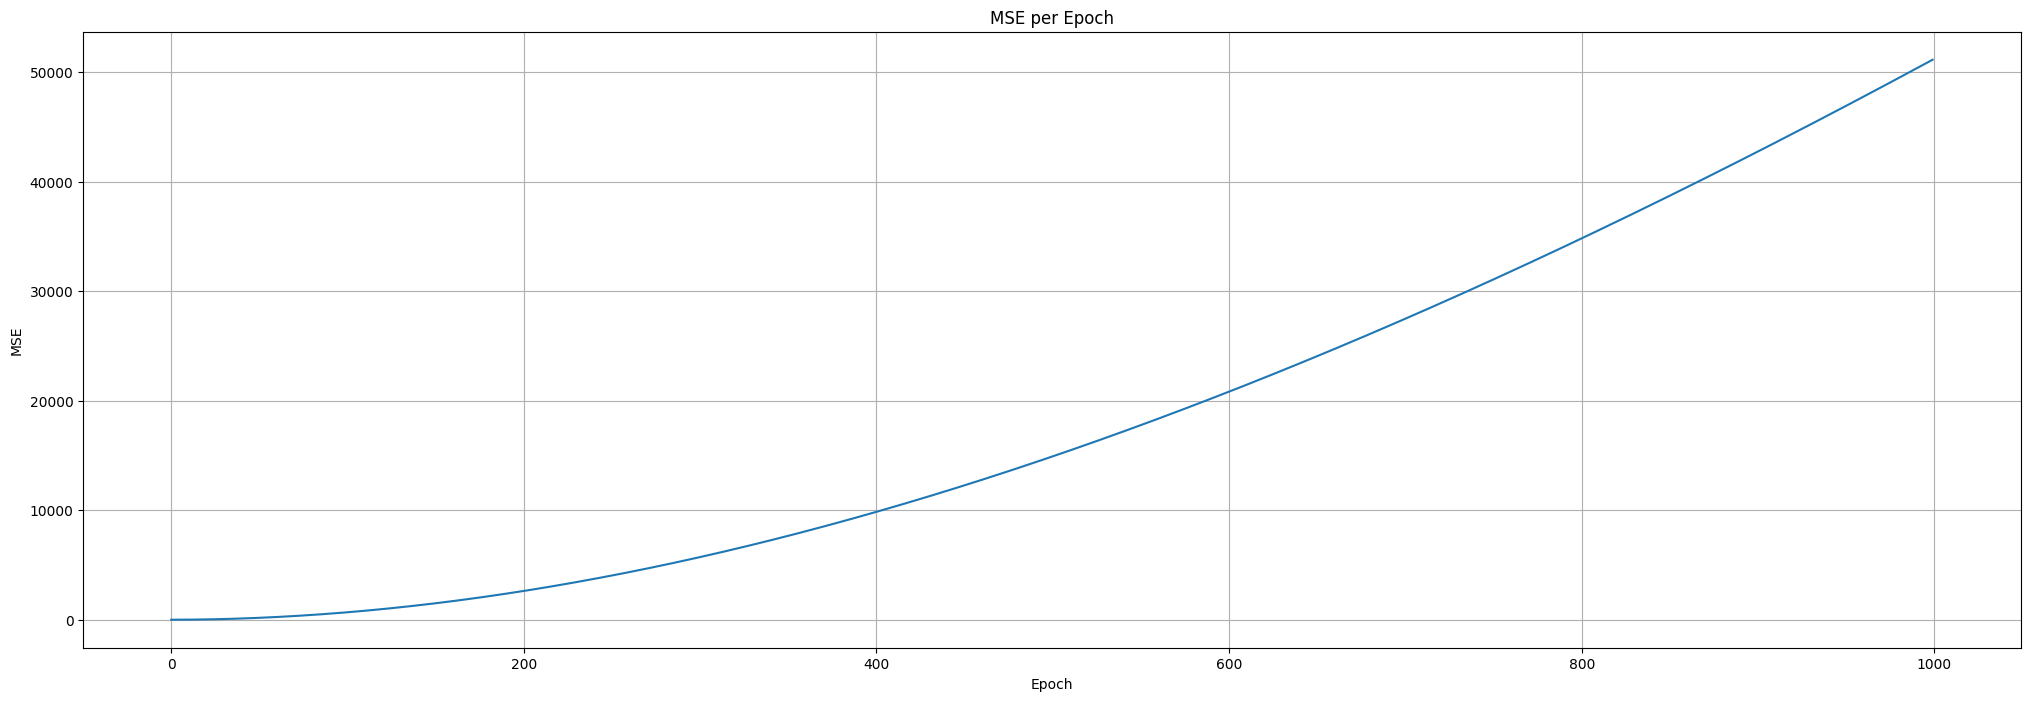

In [167]:
plt.figure(figsize=(25,8))
plt.plot(epochs,mse)
plt.title('MSE per Epoch')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

### Using scitkit-learn

In [186]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import numpy as np

scikit_reg = LinearRegression()
scikit_reg.fit(df_2.loc[:,['sqft_living']],df_2['price'])

scikit_y_predicted = scikit_reg.predict(df_2.loc[:,['sqft_living']])

scikit_mse = metrics.mean_squared_error(df_2['price'], scikit_y_predicted)
scikit_r2 = metrics.r2_score(df_2['price'], scikit_y_predicted)
print(scikit_r2)

0.4928532179037931


### Accuracy of regression models

$ R^2 = 1 - error^2 / \sum variance$

$ R^2 = 1 - (\sum_i^N (y\_pred - y)^2 / \sum_i^N (\hat y - y)^2 ) $

$ \hat y \ldots $ average of y 

In [168]:
def predict(X, y):
    n = len(X)
    y_pred = b_0 + b_1 * X
    return y_pred

In [173]:
# Calculate the coefficient of determination
def coef_determination(y, y_pred):
    n = len(df)
    R2 = 1-(sum((y_pred-y)**2)/sum((y.mean()-y)**2))
    return R2

In [174]:
y_pred = predict(df_2['sqft_living'], df_2['price'])
r2 = coef_determination(df_2['price'], y_pred)
print(r2)

-0.6664790925828734


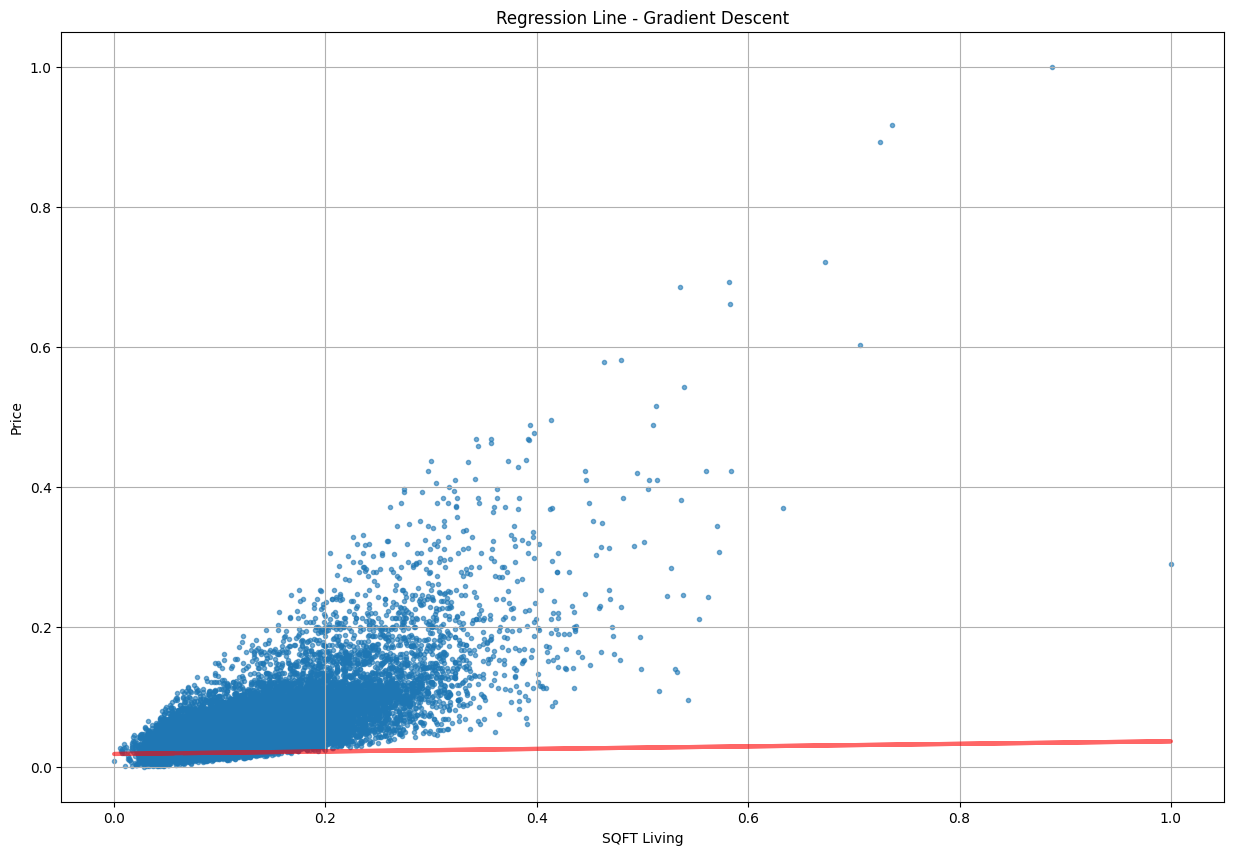

In [187]:
# plot the data
plt.figure(figsize=(15,10))
plt.scatter(df_2['sqft_living'], df_2['price'], marker=".", alpha=.6)
plt.plot(df_2['sqft_living'],y_pred, c = 'red', linewidth=3, alpha=.6)
plt.title('Regression Line - Gradient Descent')
plt.xlabel('SQFT Living')
plt.ylabel('Price')
plt.grid(True)
plt.show()

## Results

- I have considered the whole dataset as a test set, I was curious about the results if I am not using a train/test split
- The results seems quite into a wrong direction of interpretation
- MSE tend to scale up from epoch to epoch which tends to seem like an underfitting problem
- R squared result shows a negative influence with respect to the square meters of living
- Scikit Linear Regression tends to have a better R squared and better results